<a href="https://colab.research.google.com/github/JorgeLGonzalez97/Conjunto-de-Datos-de-Accidentes-de-REINO-UNIDO-UK-/blob/main/01_Exploracion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

import pandas as pd

In [5]:
%%bash
chmod 600 ./kaggle.json
export KAGGLE_CONFIG_DIR=.
kaggle datasets download -d devansodariya/road-accident-united-kingdom-uk-dataset
unzip road-accident-united-kingdom-uk-dataset.zip

chmod: no se puede acceder a './kaggle.json': No existe el archivo o el directorio
Traceback (most recent call last):
  File "/home/ana/.local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/ana/.local/lib/python3.10/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/ana/.local/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in .. Or use the environment method.


Archive:  road-accident-united-kingdom-uk-dataset.zip
  inflating: UK_Accident.csv         


In [6]:
Full_Data:DataFrame = pd.read_csv('UK_Accident.csv')
Total_Data:DataFrame = Full_Data.copy()
New_Data:DataFrame = Total_Data[Total_Data["Year"] == 2013]

In [7]:
New_Data.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,138660.0000,138660.000000,1.386600e+05,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.000000,138660.0
mean,249044.5000,444570.930009,2.937771e+05,-1.364462,52.531577,30.591245,2.835281,1.823980,1.324607,4.114481,350.967395,4.070676,1012.768672,38.529064,2.715116,368.979114,1.350930,2013.0
std,40027.8385,95656.846984,1.609015e+05,1.405178,1.448954,25.453417,0.400976,0.726114,0.801197,1.914173,259.945722,1.416495,1808.137585,13.946743,3.200194,1268.605694,0.477263,0.0
min,179715.0000,66435.000000,1.029000e+04,-7.489410,49.912941,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2013.0
25%,214379.7500,381530.000000,1.765900e+05,-2.277468,51.475138,7.000000,3.000000,1.000000,1.000000,2.000000,112.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2013.0
50%,249044.5000,448420.000000,2.491200e+05,-1.286932,52.127021,31.000000,3.000000,2.000000,1.000000,4.000000,340.000000,3.000000,143.000000,30.000000,3.000000,0.000000,1.000000,2013.0
75%,283709.2500,525870.000000,3.931262e+05,-0.185856,53.432789,46.000000,3.000000,2.000000,1.000000,6.000000,531.000000,6.000000,794.000000,50.000000,6.000000,0.000000,2.000000,2013.0
max,318374.0000,655304.000000,1.183525e+06,1.758722,60.532880,98.000000,3.000000,67.000000,70.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,2.000000,2013.0


In [8]:
columnas_con_faltantes = New_Data.columns[New_Data.isnull().sum() > 0]

# Mostrar las columnas con datos faltantes
print("Columnas con datos faltantes:")
print(columnas_con_faltantes)

Columnas con datos faltantes:
Index(['Time', 'LSOA_of_Accident_Location'], dtype='object')


In [9]:
New_Data = New_Data.copy()
New_Data.dropna(subset=['Time'], inplace=True)

In [10]:
null_colum = New_Data.isnull().sum()

# Mostrar la cantidad de datos faltantes por columna
print("Cantidad de datos faltantes por columna:")
null_colum[null_colum!=0]

Cantidad de datos faltantes por columna:


LSOA_of_Accident_Location    9756
dtype: int64

In [11]:
New_Data['Timestamp'] = New_Data['Date'] + ' ' + New_Data['Time']
New_Data['Timestamp'] = pd.to_datetime(New_Data['Timestamp'], format='%d/%m/%Y %H:%M')
New_Data['Day_of_Week'] = New_Data['Timestamp'].dt.day_name().astype(str)
New_Data['Time'] = New_Data['Timestamp'].dt.time
New_Data['Month'] = New_Data['Timestamp'].dt.month_name().astype(str)
New_Data['Hour'] = New_Data['Timestamp'].dt.hour
New_Data['Day_of_Month'] = New_Data['Timestamp'].dt.day

In [12]:
null_colum = null_colum / len(New_Data) * 100
print("Porcentaje de datos faltantes por columna:")
null_colum[null_colum!=0]

Porcentaje de datos faltantes por columna:


LSOA_of_Accident_Location    7.036321
dtype: float64

**Se identifica que la columna *LSOA_of_Accident_Location* contiene datos faltantes, pero debido a que se trata de una clasificación LSOA, su arreglo no es sencillo. Además, se ha determinado que esta columna no aporta significativamente a nuestro análisis. Por lo tanto, se ha decidido proceder con la eliminación de la columna *LSOA_of_Accident_Location* del conjunto de datos, con el fin de simplificar y mejorar nuestra evaluación.**

In [13]:
New_Data.drop(['Year', 'LSOA_of_Accident_Location'], axis=1, inplace=True)

In [14]:
dup_rows = New_Data[New_Data.duplicated()]
print("No. de filas repetidas: ", New_Data.duplicated().sum())
New_Data.drop_duplicates(inplace=True)
print("No. de filas restantes: ", New_Data.shape[0])

No. de filas repetidas:  0
No. de filas restantes:  138652


In [15]:
New_Data.drop_duplicates(inplace=True)
print("No. de filas restantes: ", New_Data.shape[0])

No. de filas restantes:  138652


In [16]:
columnas_candidatas = []
for columna in New_Data.columns:
    if New_Data[columna].nunique() <= 5:  # Aqui podemos ajustar el limite para considerar columna categorica 
        columnas_candidatas.append(columna)

# Imprimir columnas candidatas
if len(columnas_candidatas) > 0:
    print("Columnas candidatas a categóricas:")
    print(columnas_candidatas)
else:
    print("No se encontraron columnas candidatas a categóricas.")

Columnas candidatas a categóricas:
['Accident_Severity', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Light_Conditions', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident']


/home/ana/.local/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


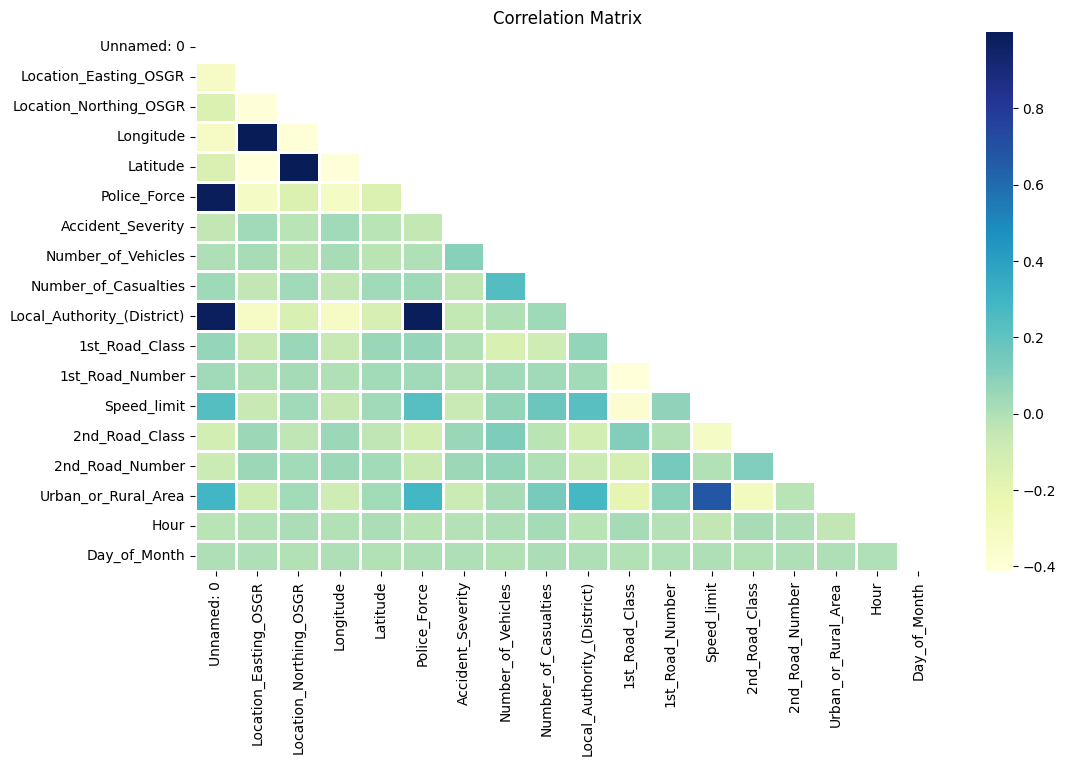

In [17]:
plt.figure(figsize = (12,7))
corr = New_Data.corr(method='spearman',numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f", annot_kws={"fontsize":8})
cormat.set_title('Correlation Matrix')
plt.show()

In [18]:
New_Data.keys()

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Timestamp', 'Month', 'Hour', 'Day_of_Month'],
      dtype='object')

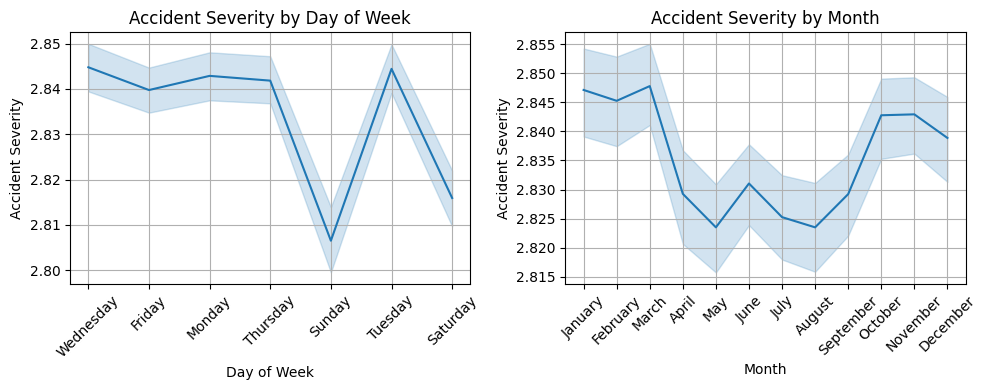

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tu código para cargar los datos y tenerlos en un DataFrame
# Supongamos que el DataFrame se llama "New_Data" y tiene las columnas "Day_of_Week", "Month" y "Accident_Severity"

# Crear una figura con dos subplots dispuestos en una fila
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Graficar el primer subplot: Accident Severity by Day of Week
sns.lineplot(x='Day_of_Week', y='Accident_Severity', data=New_Data, ax=axes[0])
axes[0].set_title('Accident Severity by Day of Week', fontsize=12)
axes[0].set_xlabel('Day of Week', fontsize=10)
axes[0].set_ylabel('Accident Severity', fontsize=10)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(True)  # Mostrar la cuadrícula


# Graficar el segundo subplot: Accident Severity by Month
sns.lineplot(x='Month', y='Accident_Severity', data=New_Data, ax=axes[1])
axes[1].set_title('Accident Severity by Month', fontsize=12)
axes[1].set_xlabel('Month', fontsize=10)
axes[1].set_ylabel('Accident Severity', fontsize=10)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].grid(True)  # Mostrar la cuadrícula


plt.tight_layout()

plt.show()


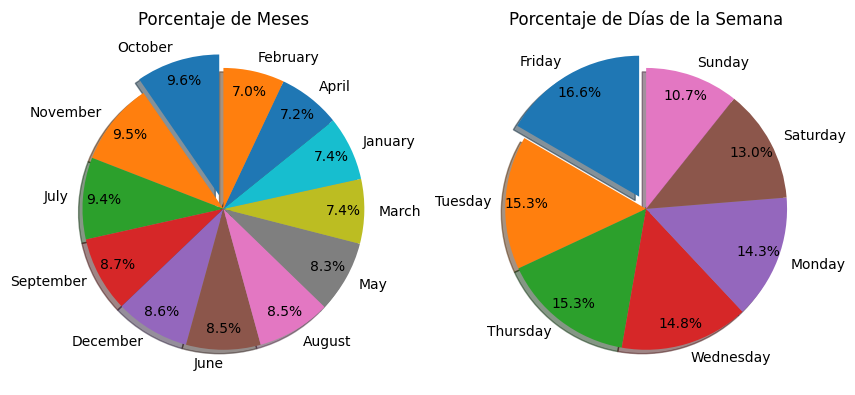

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con dos subplots en una fila
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Crear el gráfico de pie para la columna "Month"
month_counts = New_Data['Month'].value_counts()
explode1 = [0.1 if i == month_counts.idxmax() else 0 for i in month_counts.index]  # Mover la rebanada más grande hacia afuera
ax1.pie(month_counts, labels=month_counts.index, autopct='%1.1f%%', startangle=90, explode=explode1,
        shadow=True, pctdistance=0.85)  # Establecer sombreado y distancia de porcentaje
ax1.set_title("Porcentaje de Meses")

# Crear el gráfico de pie para la columna "Day_of_Week"
day_of_week_counts = New_Data['Day_of_Week'].value_counts()
explode2 = [0.1 if i == day_of_week_counts.idxmax() else 0 for i in day_of_week_counts.index]  # Mover la rebanada más grande hacia afuera
ax2.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', startangle=90,
        shadow=True, pctdistance=0.85, explode=explode2)  # Establecer sombreado, distancia de porcentaje y rebanada afuera
ax2.set_title("Porcentaje de Días de la Semana")

# Mostrar los sub


# }
# +
# plots
# plt.show()}+´´+}}

plt.show()




In [21]:
New_Data['Month'].value_counts()

October      13320
November     13168
July         13012
September    12009
December     11886
June         11843
August       11772
May          11449
March        10284
January      10226
April         9962
February      9721
Name: Month, dtype: int64

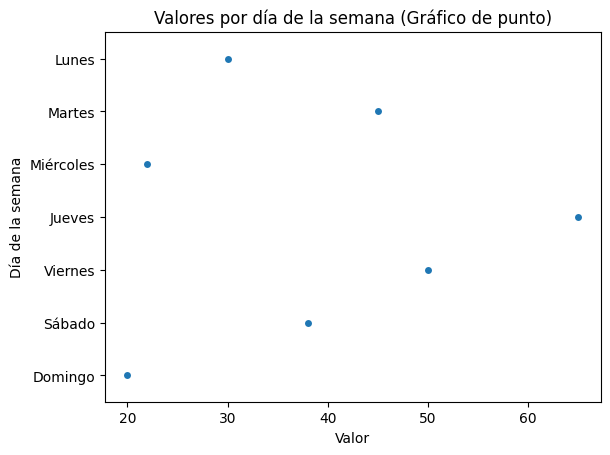

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo
dias_semana = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
valores = [30, 45, 22, 65, 50, 38, 20]

# Crear el gráfico de punto con Seaborn
sns.stripplot(x="Valor", y="Día de la semana", data=pd.DataFrame({'Día de la semana': dias_semana, 'Valor': valores}))

# Personalizar el gráfico
plt.title("Valores por día de la semana (Gráfico de punto)")
plt.xlabel("Valor")
plt.ylabel("Día de la semana")
plt.show()